# Correlation 

### Correlation between variables in the film data.
#### What is the correlation between budget and gross amount realised.

In [1]:
# import packgaes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot we will create



In [2]:
# import the data
films=pd.read_csv(r'C:\Users\nem\Desktop\pandas_ demo\films.csv')


### Knowing your data

In [3]:
# take a look at the data
films.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [4]:
films.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
# checking the various coloums available

films.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### There are 15 columns and 7668 rows

#### 

In [7]:
# checking to see if there is missing data
for col in films.columns:
    missing_data_pct=np.mean(films[col].isnull())
    print('{} - {}%'.format(col,missing_data_pct) )


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### The percentage of missing data found  negligeble since they are under 1 percent

In [8]:
# data types
films.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### The datatypes of Year is integer, score, votes budget and gross and runtime are all floats because the contain decimals the rest are all objects.

#

 changing the datatype of some floats into int64 for more readability

In [9]:

# from the null checking, there are some data missing even though its negligible.
# but to convert the datatypes, you must fill in the data or a value else there will be an error

# fill in the missing values in budget and gross column with zero
films['gross'] = films['gross'].fillna(0)

films['budget'] = films['budget'].fillna(0)


In [10]:
# convert the datatypes to int64

films['budget'] = films['budget'].astype('int64')

films['gross'] = films['gross'].astype('int64')

In [11]:
films.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

Match year to year released colmuns, the data were not matching
so a new column will be created out of the realeased date to create a correct "year of released"
create new column called " released_year" and " released region"

In [12]:
#create a function for the string works
n=21
m=14

In [13]:
# using th n = 21 function to create released_year year column
films['released_year']=films['released'].astype(str).str[-n:-15]

In [14]:
# using the m = 14 function to create the released region column
films['released_region']=films['released'].astype(str).str[-m:-1]

In [15]:
films.head(2)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_region
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States


####  " released_year" and " released region" columns are now created.

In [16]:
# display all records
# pd.set_option('display.max_row', None)

In [17]:
 # sort the data so that the highest grossing movie will be on top
films=films.sort_values(['gross'], inplace = False, ascending =False)

In [18]:
# checking to see if there are duplicates
films['company'].sort_values(ascending=False).head()
# there are duplicates but they are needed

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

#### These are the top 5 Top grossing Companies

# 

## Correlation analysis

In [40]:
#build a scatter plot #budget high correlation to gross

#plt.scatter(x=films['budget'], y=films['gross'])
#plt.title('Budget vs Gross Earning')
#plt.xlabel('Gross Earnings')
#plt.ylabel('Budget for film')
#plt.show




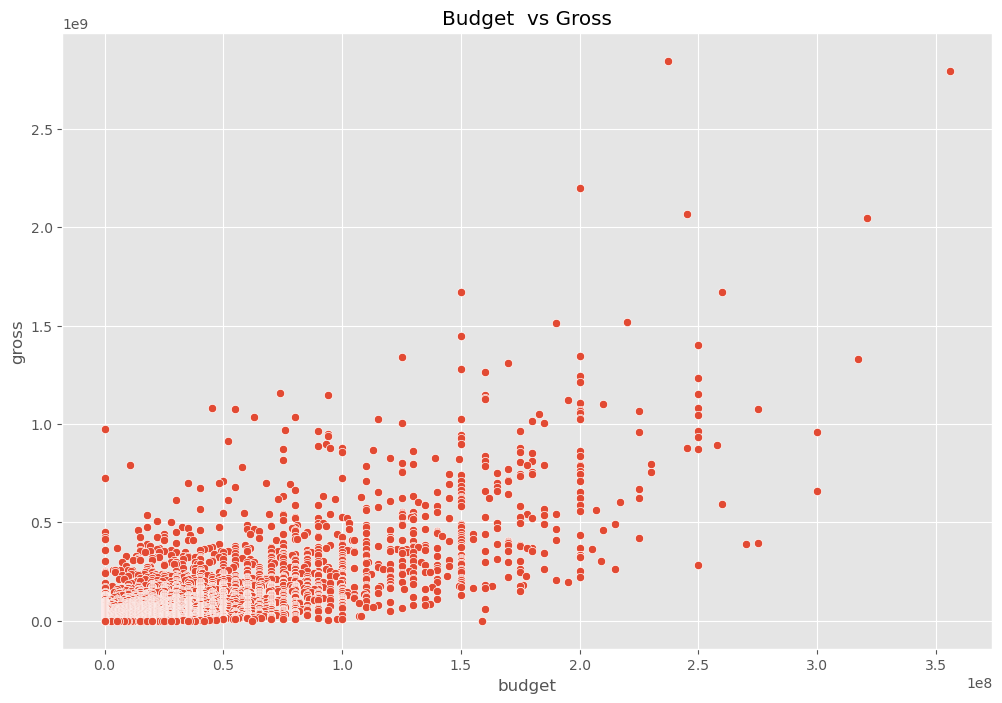

In [36]:
# comparing two variables scatter plot
ax=sns.scatterplot(
               x='budget',
               y='gross',
               data= films )
ax.set_title('Budget  vs Gross') 
plt.show()

1. From the scatter plot, it is realised that the lower the budget spent on the movie, the lower the gross amount. At the same time, the highet budgeted movies raked in a higher gross.
2. Most of the films produced were done will low budget.
3. A few movies were produced with high budget.



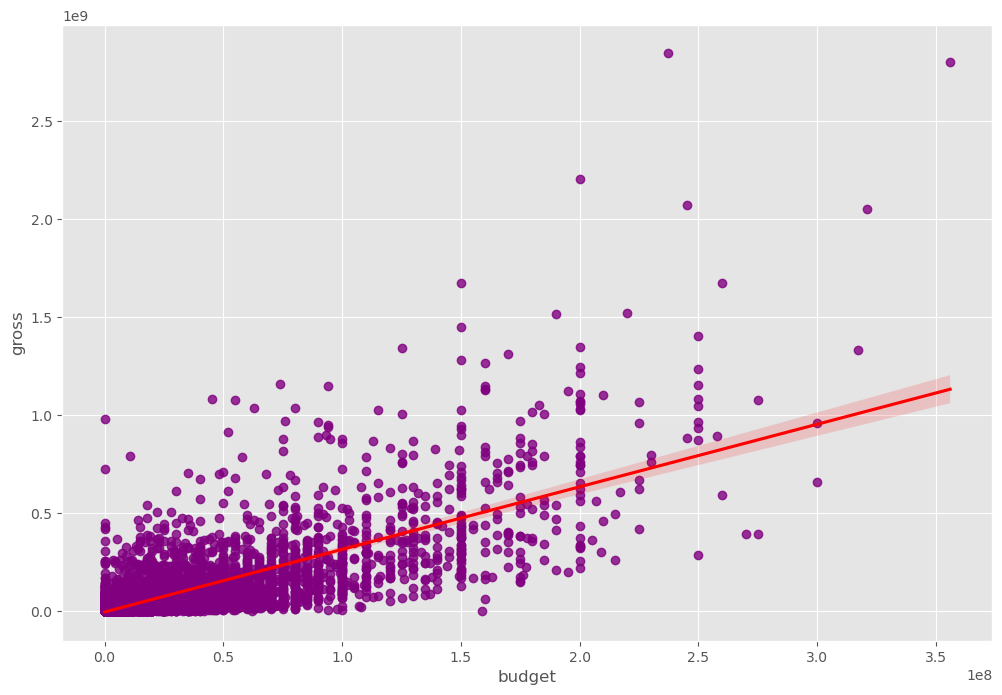

In [37]:
# regression plot
sns.regplot(x='budget',y='gross', data=films, scatter_kws = {"color": "purple"}, line_kws = {"color":"red"})
plt.show()

There is a positive correlation between the budget and gross. Meaning, as the budget increases, the gross also increases.

In [38]:
films.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_region
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,45,414
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,55,414
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,31,414
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,51,414
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,54,414


In [24]:
#There's a positive correlation between the budget and the gross revenue. 

films_correlation= films[[ 'year', 'score', 'votes',
        'budget', 'gross', 
       'runtime']].dropna().corr()
films_correlation
    

,year,score,votes,budget,gross,runtime
year,1.000000,0.098526,0.223182,0.310266,0.262744,0.120785
score,0.098526,1.000000,0.409186,0.055551,0.186270,0.399451
votes,0.223182,0.409186,1.000000,0.486899,0.632845,0.309212
budget,0.310266,0.055551,0.486899,1.000000,0.750129,0.269606
gross,0.262744,0.186270,0.632845,0.750129,1.000000,0.245305
runtime,0.120785,0.399451,0.309212,0.269606,0.245305,1.000000


The correlation between budget and gross is over 75%

The correlation between votes and gross is over 63%


<function matplotlib.pyplot.show(close=None, block=None)>

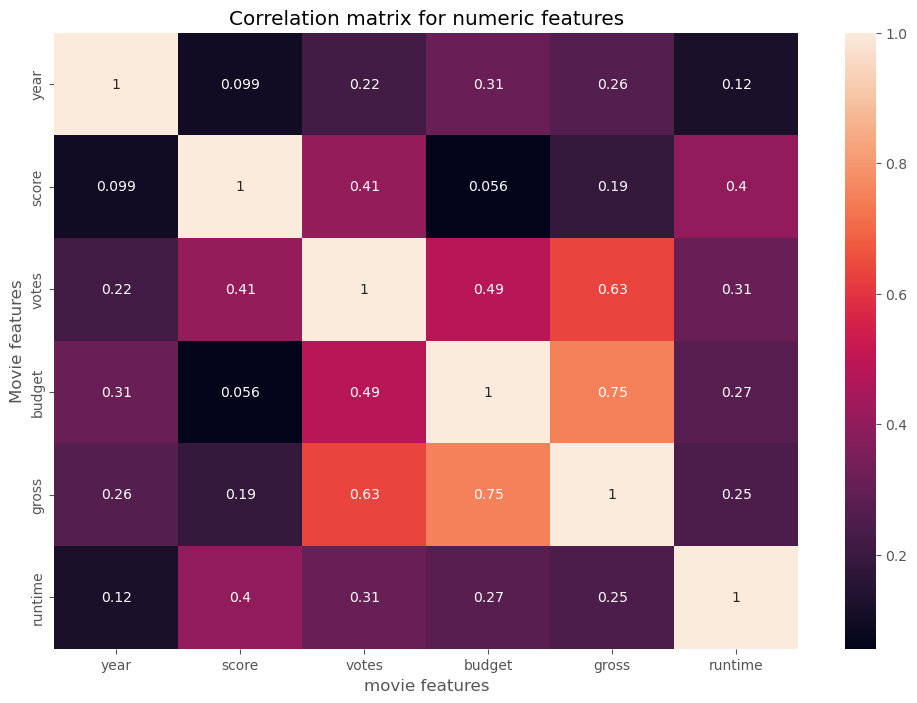

In [26]:
correlation_matrix = films_correlation
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('Movie features')
plt.show

The correlation between budget and gross is over 75%

The correlation between votes and gross is over 63%

In [27]:
# Convert their data types to int.
# This is to enable us to run correlation on all the variables.

In [28]:
films_numerics = films
for col_name in films_numerics.columns:
    if (films_numerics[col_name].dtype == 'object'):
        films_numerics[col_name]=films_numerics[col_name].astype('category')
        films_numerics[col_name]=films_numerics[col_name].cat.codes
    
films_numerics.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_region
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,45,414
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,55,414
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,31,414
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,51,414
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,54,414
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,55,414
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,51,414
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,48,414
6646,2145,5,0,2015,221,7.1,370000.0,1189,706,2721,55,190000000,1515341399,2281,137.0,51,414
7494,2131,4,2,2019,2676,6.8,148000.0,432,1950,1527,55,150000000,1450026933,2315,103.0,55,414


In [41]:
films.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_region
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,45,414
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,55,414
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,31,414
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,51,414
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,54,414


<function matplotlib.pyplot.show(close=None, block=None)>

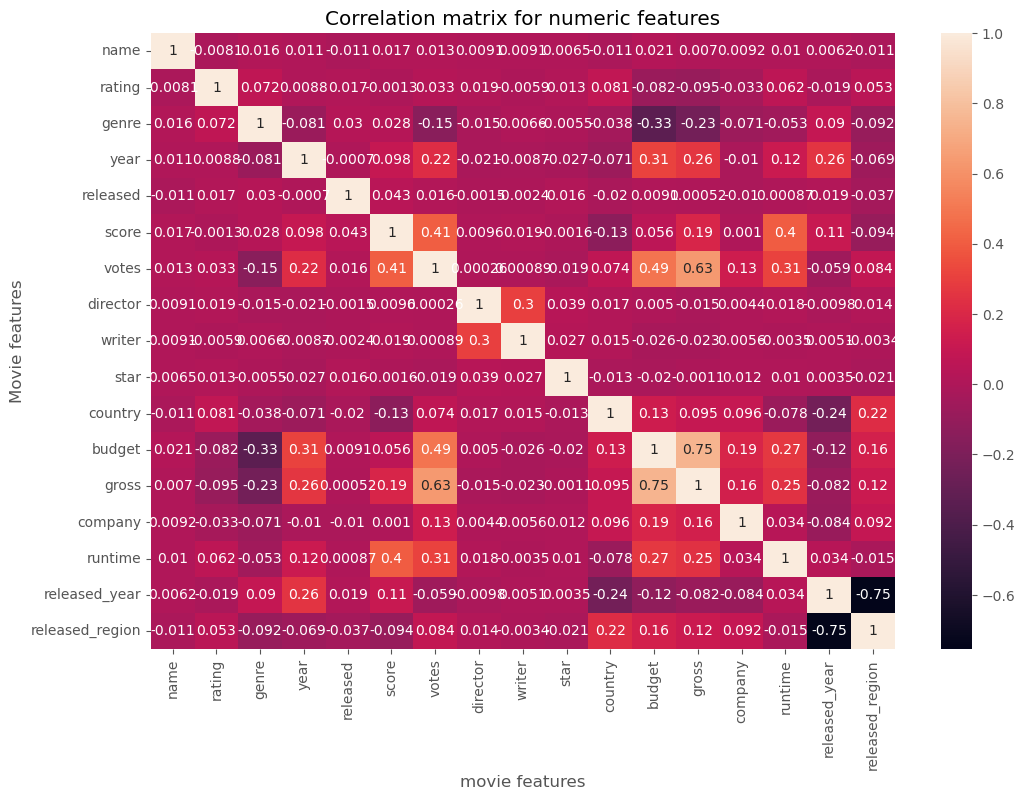

In [30]:
correlation_matrix = films_numerics.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('Movie features')
plt.show

In [31]:
# working further on the correlation

films_numerics.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_region
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.006236,-0.011286
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,-0.018945,0.052782
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.089616,-0.091924
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.257354,-0.068554
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.018669,-0.037255
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106257,-0.093811
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,-0.059448,0.084484
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.009826,0.014226
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,0.005085,-0.003367
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.003471,-0.021006


In [32]:
# unstacking correlation to make it  easier to see the pairings well
new_correlation_matrix =  films_numerics.corr()
correlation_pairs = new_correlation_matrix.unstack()
correlation_pairs


name             name               1.000000
                 rating            -0.008069
                 genre              0.016355
                 year               0.011453
                 released          -0.011311
                                      ...   
released_region  gross              0.116555
                 company            0.092015
                 runtime           -0.014736
                 released_year     -0.754765
                 released_region    1.000000
Length: 289, dtype: float64

In [33]:
# sort the correlated pairs
sorted_pairs= correlation_pairs.sort_values()
sorted_pairs

released_year    released_region   -0.754765
released_region  released_year     -0.754765
genre            budget            -0.334021
budget           genre             -0.334021
released_year    country           -0.236516
                                      ...   
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
released_year    released_year      1.000000
released_region  released_region    1.000000
Length: 289, dtype: float64

In [34]:
#investigate high correlation
high_correlation= sorted_pairs[(sorted_pairs)> 0.5] 

high_correlation

gross            votes              0.632834
votes            gross              0.632834
gross            budget             0.750157
budget           gross              0.750157
name             name               1.000000
writer           writer             1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
released_year    released_year      1.000000
released_region  released_region    1.000000
dtype: float64

# In conclusion
1. From the scatter plot, it is realised that the lower the budget spent on the movie, the lower the gross amount. Vice versa, the higher budgeted movies raked in a higher gross.
2. Most of the films produced were done will low budget.
3. A few movies were produced with high budget.
4. There is a positive correlation between the budget and gross. Meaning, as the budget increases, the gross also increases.
5. The correlation between budget and gross is over 75%. This was a positive correlation. It also meant that budget had an influence on how the movie will perform on the market.
6. The correlation between votes and gross is over 63%. This means the votes on the movie influenced the performance of the movie.
7. Budget had low correlation with votes.
8. Company did not have have much influence on the gross of the film though it was a possitive correlation.